<a href="https://colab.research.google.com/github/christianisita/rock-paper-scissors-classifier/blob/master/Rock_Paper_Scissor_SitaChristiani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# install package for splitting image folder
!pip install split_folders

In [0]:
# import package
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
%matplotlib inline

In [0]:
# getting dataset
!wget  --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-15 16:19:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  16.4MB/s    in 16s     

2020-06-15 16:19:20 (18.9 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# extract zip
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
# checking dataset directories
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors', 'paper']

In [0]:
# removing unused file
import shutil
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images', ignore_errors=True)
os.remove('/tmp/rockpaperscissors/README_rpc-cv-images.txt')

In [0]:
# checking dataset directories
os.listdir('/tmp/rockpaperscissors')

['rock', 'scissors', 'paper']

In [0]:
# split dataset into train and val folder (80% training and 20% validation) and put it into dataset directory
import split_folders
split_folders.ratio('/tmp/rockpaperscissors', output="dataset", seed=1221, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3297.23 files/s]


In [0]:
# checking dataset directory
os.listdir('dataset')

['val', 'train']

In [0]:
# checking train directory
os.listdir('dataset/train')

['rock', 'scissors', 'paper']

In [0]:
# checking val directory
os.listdir('dataset/val')

['rock', 'scissors', 'paper']

In [0]:
train_dir = 'dataset/train'
val_dir = 'dataset/val'

In [0]:
# image augmentation using ImageDataGenerator
train_data = ImageDataGenerator(rescale=1./255,
                                rotation_range=30,
                                horizontal_flip=True,
                                vertical_flip=True,
                                shear_range=0.2,
                                fill_mode='nearest')

val_data = ImageDataGenerator(rescale=1./255)

In [0]:
# generate train and validation data that has been augmented
train_generator = train_data.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 batch_size=5,
                                                 class_mode='categorical')

val_generator = val_data.flow_from_directory(val_dir,
                                             target_size=(150,150),
                                             batch_size=5,
                                             class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [0]:
# modeling
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='valid'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='valid'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
# fitting model and assign it to history variable for plotting training data and validation data
history = model.fit(train_generator, steps_per_epoch=20, epochs=25, validation_data=val_generator, validation_steps=5, verbose=1)

Epoch 1/25
20/20 [==============================] - 8s 413ms/step - loss: 1.5459 - accuracy: 0.3400 - val_loss: 1.1024 - val_accuracy: 0.2800
Epoch 2/25
20/20 [==============================] - 8s 402ms/step - loss: 1.1188 - accuracy: 0.3700 - val_loss: 1.0910 - val_accuracy: 0.3600
Epoch 3/25
20/20 [==============================] - 8s 403ms/step - loss: 1.2476 - accuracy: 0.4000 - val_loss: 1.1056 - val_accuracy: 0.3600
Epoch 4/25
20/20 [==============================] - 8s 399ms/step - loss: 1.1662 - accuracy: 0.3400 - val_loss: 1.0671 - val_accuracy: 0.7200
Epoch 5/25
20/20 [==============================] - 8s 402ms/step - loss: 1.1098 - accuracy: 0.4200 - val_loss: 1.0671 - val_accuracy: 0.5200
Epoch 6/25
20/20 [==============================] - 8s 400ms/step - loss: 1.0700 - accuracy: 0.5600 - val_loss: 0.8658 - val_accuracy: 0.6800
Epoch 7/25
20/20 [==============================] - 8s 400ms/step - loss: 0.7817 - accuracy: 0.6200 - val_loss: 0.8436 - val_accuracy: 0.6400
Epoch 

In [0]:
#checking accuracy using validation data
model.evaluate(val_generator)

88/88 [==============================] - 9s 101ms/step - loss: 0.2331 - accuracy: 0.9248


[0.23310421407222748, 0.9248291850090027]

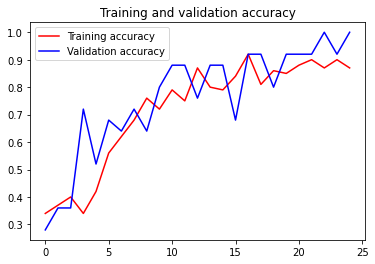

<Figure size 432x288 with 0 Axes>

In [0]:
# plotting accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Using TensorFlow backend.


Saving right_fist.png to right_fist (19).png
right_fist.png
rock


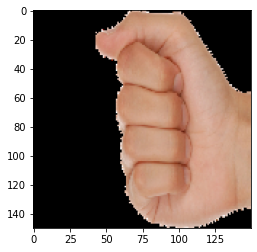

In [0]:
# prediction
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()

for path in uploaded.keys():
  # predicting images
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  pred = model.predict(images, batch_size=10)
  predicted_class_indices=np.argmax(pred,axis=1)
  print(path)
  for k,v in train_generator.class_indices.items():
    if predicted_class_indices[0] == v:
      print(k)

AUTHOR : SITA CHRISTIANI, EMAIL : sitachristiani@gmail.com
